In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/NN Dataset.zip','r') as zipObj:
  zipObj.extractall('/content/gdrive/MyDrive/Images')

In [4]:
with ZipFile('/content/drive/MyDrive/data.zip','r') as zipObj:
    zipObj.extractall('/content/drive/MyDrive/testdata')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from random import shuffle

In [6]:
trainpath = '/content/gdrive/MyDrive/Images/Train/'
testpath = '/content/drive/MyDrive/testdata/'
#predpath = '/content/drive/MyDrive/testdata/ATest/'


In [7]:
code = {'Yoga':0 ,'Basketball':1,'Football':2,'Swimming':3,'Rowing':4,'Tennis':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    


In [8]:
augmentation =  tf.image.random_flip_left_right
augmentation1 = tf.image.random_crop
augmentation2 = tf.image.random_brightness
augmentation3 = tf.image.random_flip_up_down
augmentation4 = tf.keras.preprocessing.image.random_channel_shift
augmentation5 = tf.keras.preprocessing.image.random_zoom
augmentation6 = tf.keras.preprocessing.image.random_rotation
augmentation7 = tf.keras.preprocessing.image.random_shear
augmentation8 = tf.keras.preprocessing.image.random_shift


In [9]:
s = 150
X_train = []
y_train = []
for file in gb.glob(pathname= str( trainpath+'*.*' )): 
        image = cv2.imread(file)
        temp = temp2 = temp3=temp4=temp5=temp6=temp7=temp8=image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        l = file.split('_')
        l = l[0][len(trainpath):]
        y_train.append(code[l])

        temp2=augmentation(temp2)
        X_train.append(list(temp2))
        y_train.append(code[l])
        temp5 = augmentation5(temp5,[0.5,1.5])
        X_train.append(list(temp5))
        y_train.append(code[l])
        temp6 = augmentation6(temp6,0.3)
        X_train.append(list(temp6))
        y_train.append(code[l])
        temp7 = augmentation7(temp7,0.5)
        X_train.append(list(temp7))
        y_train.append(code[l])
        temp8 = augmentation8(temp8,0.5,0.5)
        X_train.append(list(temp8))
        y_train.append(code[l])
        if l == 'Rowing' or l == 'Basketball' or l == 'Tennis' or l == 'Swimming': 
          temp = augmentation(temp)
          X_train.append(list(temp))
          y_train.append(code[l])
          temp3 = augmentation3(temp3)
          X_train.append(list(temp3))
          y_train.append(code[l])
          if l != 'Swimming':
            aug = augmentation2(image_array,0.5)
            X_train.append(list(aug))
            y_train.append(code[l])

print(len(X_train))
print(len(y_train))

12315
12315


In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))


In [10]:

X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    if(folder == 'ATest'): continue
    files = gb.glob(pathname= str(testpath+folder+'/*.*'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder.capitalize()])
print(len(X_test))
print(len(y_test))        

653
653


In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)

In [12]:

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)
#x_pred = np.array()

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')
print(f'x_val shape  is {X_val.shape}')
print(f'y_val shape  is {y_val.shape}')


X_train shape  is (11083, 150, 150, 3)
X_test shape  is (653, 150, 150, 3)
y_train shape  is (11083,)
y_test shape  is (653,)
x_val shape  is (1232, 150, 150, 3)
y_val shape  is (1232,)


In [13]:
vgg_16 = keras.models.Sequential([
        #block 1
        keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(s, s, 3)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
        keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
        #block 2
        keras.layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"),
        keras.layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"),
        keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
        #block 3
        keras.layers.Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"),
        keras.layers.Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"),
        keras.layers.Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"),
        keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
        #block 4
        keras.layers.Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"),
        keras.layers.Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"),
        keras.layers.Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"),
        keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
        #block 5
        keras.layers.Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"),
        keras.layers.Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"),
        keras.layers.Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"),
        keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
        #block 6 fully connected
        keras.layers.Flatten() ,     
        keras.layers.Dense(4096,activation='relu') ,    
        keras.layers.Dense(4096,activation='relu') ,  
        keras.layers.Dropout(rate=0.5),         
        keras.layers.Dense(6,activation='softmax') ,    
        ])



In [14]:
vgg_16.compile(optimizer ='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print('Model Details are : ')
print(vgg_16.summary())


Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                               

In [15]:
epochs = 20
#ThisModel = vgg_16.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)
from keras.callbacks import ReduceLROnPlateau

ThisModel = vgg_16.fit(X_train,y_train, batch_size=64,validation_data=(X_val,y_val),epochs=epochs,verbose=1)


Epoch 1/20
174/174 [==============================] - 92s 438ms/step - loss: 7.0123 - accuracy: 0.2267 - val_loss: 1.7802 - val_accuracy: 0.2110
Epoch 2/20
174/174 [==============================] - 74s 423ms/step - loss: 1.8197 - accuracy: 0.2268 - val_loss: 1.7842 - val_accuracy: 0.2070
Epoch 3/20
174/174 [==============================] - 73s 421ms/step - loss: 1.7870 - accuracy: 0.2274 - val_loss: 1.6318 - val_accuracy: 0.2995
Epoch 4/20
174/174 [==============================] - 73s 421ms/step - loss: 1.6371 - accuracy: 0.3247 - val_loss: 1.7470 - val_accuracy: 0.3442
Epoch 5/20
174/174 [==============================] - 73s 422ms/step - loss: 1.4777 - accuracy: 0.4008 - val_loss: 1.4726 - val_accuracy: 0.4131
Epoch 6/20
174/174 [==============================] - 73s 422ms/step - loss: 1.2188 - accuracy: 0.5278 - val_loss: 1.0561 - val_accuracy: 0.5901
Epoch 7/20
174/174 [==============================] - 73s 422ms/step - loss: 0.9251 - accuracy: 0.6538 - val_loss: 0.8303 - val_ac

In [16]:
ModelLoss, ModelAccuracy = vgg_16.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))


21/21 [==============================] - 4s 121ms/step - loss: 1.7465 - accuracy: 0.7044
Test Loss is 1.7465485334396362
Test Accuracy is 0.7044410705566406


In [17]:
X_pred = []
d=[]
for folder in  os.listdir(testpath) : 
    if(folder == 'ATest'): continue
    files = gb.glob(pathname= str(testpath+folder+'/*.*'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_pred.append(list(image_array)) 
        d.append(str(file))


In [ ]:
y_result = vgg_16.predict(X_pred)

print('Prediction Shape is {}'.format(y_result.shape))

In [ ]:
#files = gb.glob(pathname= str(predpath + '*.*'))
ind=0
for x in range(len(y_result)):
  print(d[ind].split('/')[6],'   ' + getcode(np.argmax(y_result[ind])) + '  '+str(np.argmax(y_result[ind]))) 
  ind=ind+1

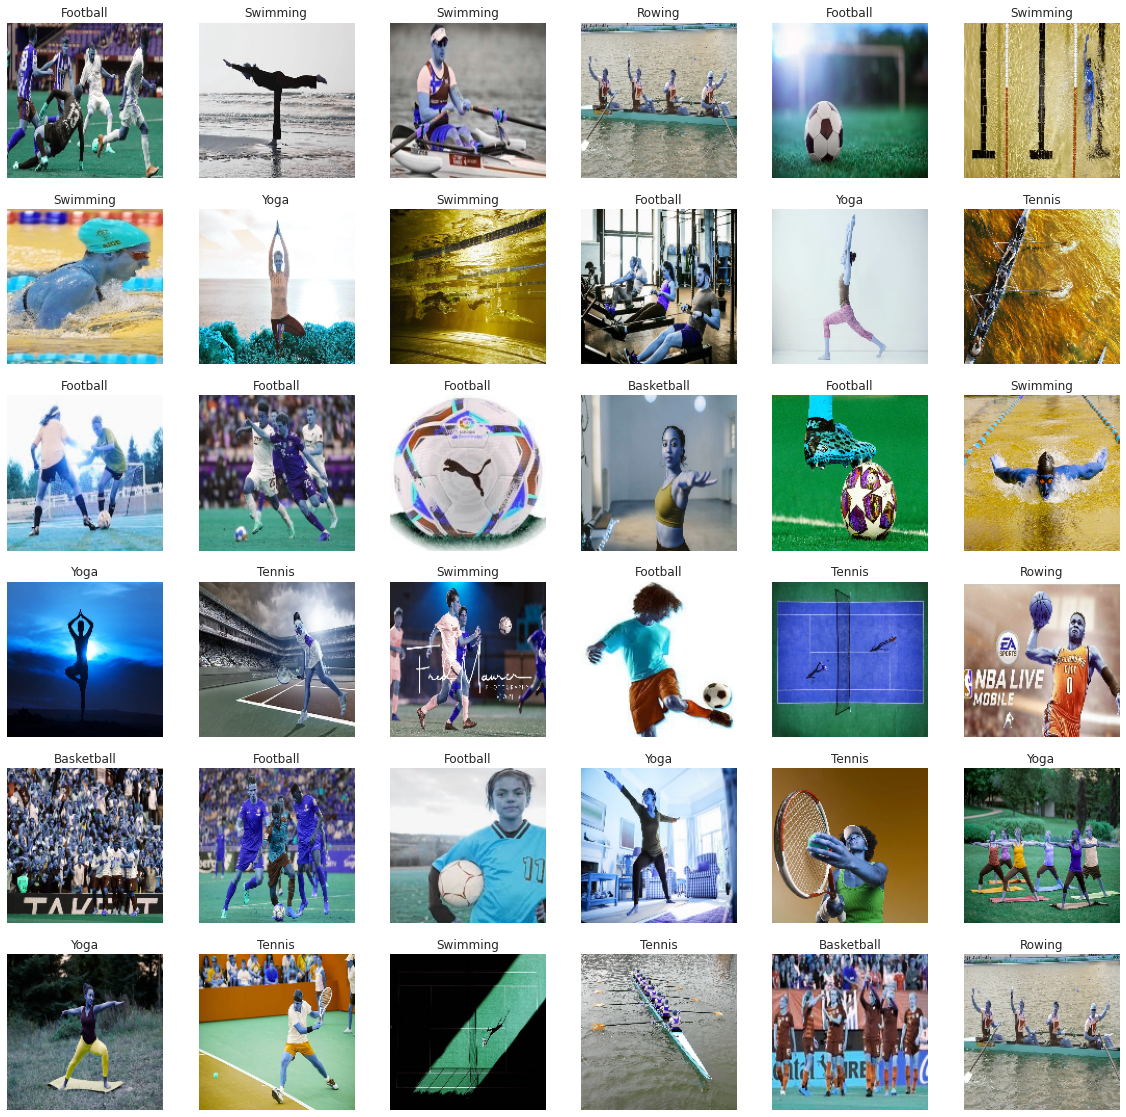

In [19]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))